<a href="https://colab.research.google.com/github/bridgetmanu/Biodiversity/blob/main/source%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read file and familiarize with the content

In [1]:
import pandas as pd # for creating, manipulating, and analyzing data
import matplotlib.pyplot as plt # for plotting charts and graphs
import sqlite3 # to perform sql queries
from scipy.stats import chi2_contingency # for performing chi-square test
import seaborn as sns # for creating intricate plots

In [4]:
# read the datasets into a dataframes

data1 = pd.read_csv("/content/observations.csv")
data2 = pd.read_csv("/content/species_info.csv")

# clean data
# remove NA values
data1 = data1.dropna()
data2 = data2.dropna()


# view dataframe
pd.DataFrame(data1)
pd.DataFrame(data2)

# create a sql database for species info dataframe

sql = sqlite3.connect("species_info.db")
data2.to_sql("species_info", sql, if_exists = "replace")
con = sql.cursor()

# create a sql database for observations dataframe

sql1 = sqlite3.connect("observations.db")
data1.to_sql("observations", sql1, if_exists = "replace")
con = sql1.cursor()

#Use sql to query the DataFrame

def sqlquery(status):
    obs1 = pd.read_sql_query("SELECT * FROM species_info where conservation_status = '" + status + "'", sql)
    obs2 = pd.DataFrame(obs1)
    return obs2
# about 10 of the species in the dataframe are threatened
# about 16 of the species in the dataframe are Endangered

status = input("Enter a conservation status(Options: Threatened; Endangered; In Recovery; Species of Concern): ")
sqlquery(status)




Enter a conservation status(Options: Threatened; Endangered; In Recovery; Species of Concern): In Recovery


,index,category,scientific_name,common_names,conservation_status
0,100,Bird,Haliaeetus leucocephalus,Bald Eagle,In Recovery
1,3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
2,3143,Bird,Falco peregrinus anatum,American Peregrine Falcon,In Recovery
3,4565,Bird,Pelecanus occidentalis,Brown Pelican,In Recovery


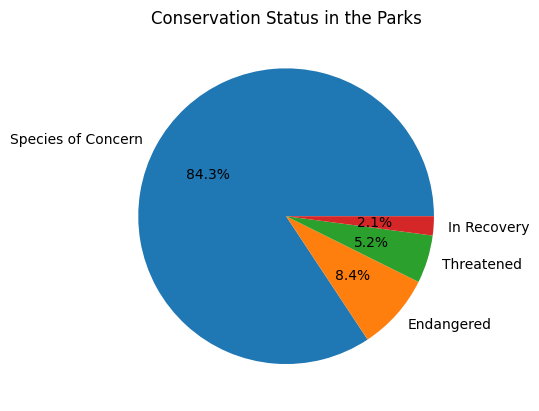

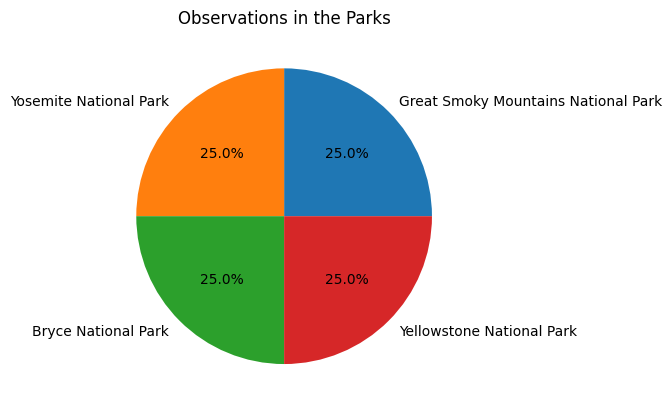

In [5]:
# Pie Chart to show the Conservation Status of species in the parks

plt.pie(data2['conservation_status'].value_counts(), labels=data2['conservation_status'].unique(), autopct='%1.1f%%')
plt.title("Conservation Status in the Parks")
plt.show()

# Pie Chart of Ratio of observations in each park
plt.pie(data1['park_name'].value_counts(), labels=data1['park_name'].unique(), autopct='%1.1f%%')
plt.title("Observations in the Parks")
plt.show()


About 84.3% of animals in the park are species of concern;
About 8.4% of the animals are endangered; 5.2% are threatened and 2.1% are in recovery.

There are equal amount of observations from each park


	Are certain types of species more likely to be endangered?
Most to least likely to be endangered

Cannis Lupus (Grey Wolf)

Cannis rufus (Red Wolf);

Myotis grisescens (Gray Myotis)

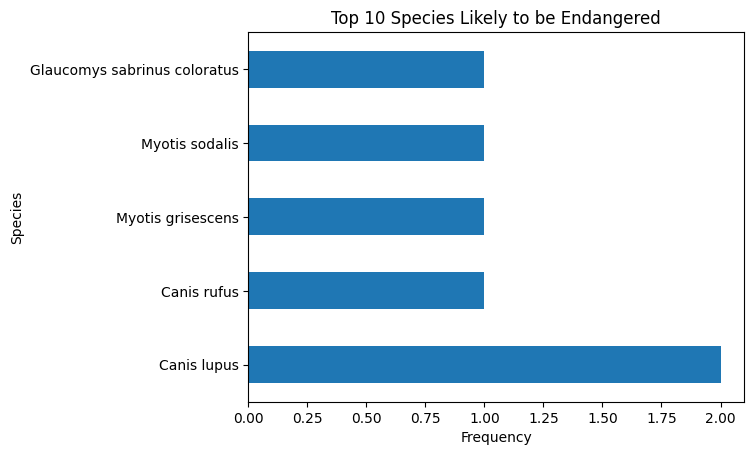

In [7]:
def sqlquery(status):
    obs = pd.read_sql_query("SELECT * FROM species_info where conservation_status = '" + status + "'", sql)
    obs3 = pd.DataFrame(obs)
    top_5 = obs3['scientific_name'].value_counts().nlargest(5)
    top_5.plot(kind='barh')
    plt.title("Top 5 Species Likely to be "+status)
    plt.xlabel("Frequency")
    plt.ylabel("Species")
    plt.show()
    return None

sqlquery(status="Endangered")



	Are the differences between species and their conservation status significant?

Using Chi-square test of independence to assess the significance of the species and their conservation status

Chi-square Test was chosen because both columns of the species info dataset are categorical.





***The Chi-square test shows that differences between category of animals and their conservation status significant***

In [31]:
"""
The null hypothesis is that the species and their conservation status are independent.
The alternative hypothesis is that the species and their conservation status are not independent.
"""

print("The null hypothesis: the category of animals and their conservation status are independent.")
print("The alternative hypothesis: the category of animals and their conservation status are not independent.")

# create a contingency(frequency) table for the selected categorical data: species and conservation status

contingency_table = pd.crosstab(data2['category'], data2['conservation_status'])
print(contingency_table)

# perform chi-square test of independence on the contingency table

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square value:", chi2)
print("P-value:", p)

if p < 0.05:
    print("The category of animals and their conservation status are not independent")
    print("Reject the null hypothesis")
else:
    print("The category of animals and their conservation status are independent.")
    print("Fail to reject the null hypothesis")


conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                     1            0                   4           2
Bird                          4            3                  72           0
Fish                          3            0                   4           4
Mammal                        7            1                  28           2
Nonvascular Plant             0            0                   5           0
Reptile                       0            0                   5           0
Vascular Plant                1            0                  43           2


***However, the chi-square test also shows that the differences between species of each category and overall and their conservation status is not significant***

In [ ]:
"""
The null hypothesis: the species in each category and their conservation status are independent.
The alternative hypothesis: the species in each category and their conservation status are not independent.
"""
Ampdata = data2[data2['category'] == 'Amphibian']
Repdata = data2[data2['category'] == 'Reptile']
Mamdata = data2[data2['category'] == 'Mammal']
Birddata = data2[data2['category'] == 'Bird']
Fishdata = data2[data2['category'] == 'Fish']
Vasdata = data2[data2['category'] == 'Vascular Plant']
Nondata = data2[data2['category'] == 'Nonvascular Plant']

cat = [Ampdata, Repdata, Mamdata, Birddata, Fishdata, Vasdata, Nondata]

def significance(cat):
    for i in cat:
        contingency_table = pd.crosstab(i['category'], i['conservation_status'])
        print(contingency_table)
        print(i['category'].unique())
        print("\n")
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print("Chi-square value:", chi2)
        print("P-value:", p)

        if p < 0.05:
            print("The species in each category and their conservation status are not independent")
            print("Reject the null hypothesis")
            print("The Chi-square shows the differences between species and their conservation status is significant")
        else:
            print("The species in each category and their conservation status are independent.")
            print("Fail to reject the null hypothesis")
            print("The Chi-square shows the differences between species and their conservation status is not significant")
        print("\n")
    return None

significance(cat)


In [10]:
# join both tables

obs_data=pd.read_sql_query("SELECT * FROM observations order by observations DESC", sql1)
species_data=pd.read_sql_query("SELECT * FROM species_info"  , sql)

merged_data = pd.merge(obs_data, species_data, on='scientific_name', how='outer')
merged_data = merged_data.dropna()

# create a sql database for the merged data
sql2 = sqlite3.connect("merged_data.db")
merged_data.to_sql("merged_data", sql2, if_exists = "replace")
con = sql2.cursor()


	which species were spotted the most at each park?
**Yellowstone NP**

Lycopodium tristachyum

**GSMNP**

Sonchus asper ssp. asper

**BNP**

Valerianella radiata

**YNP**

Ivesia shockleyi var. shockleyi



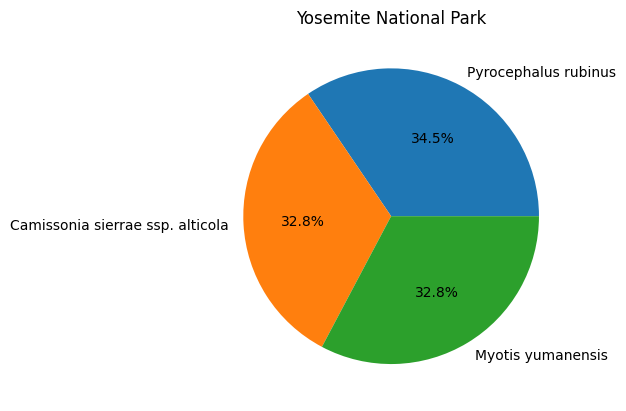

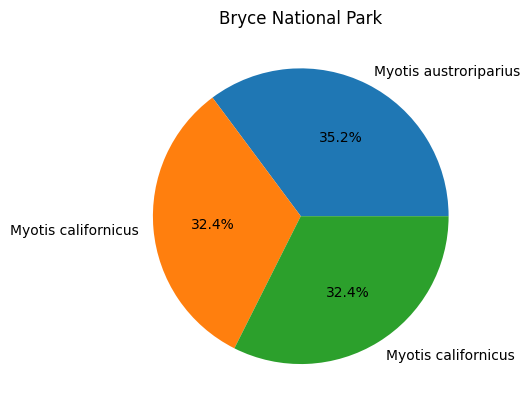

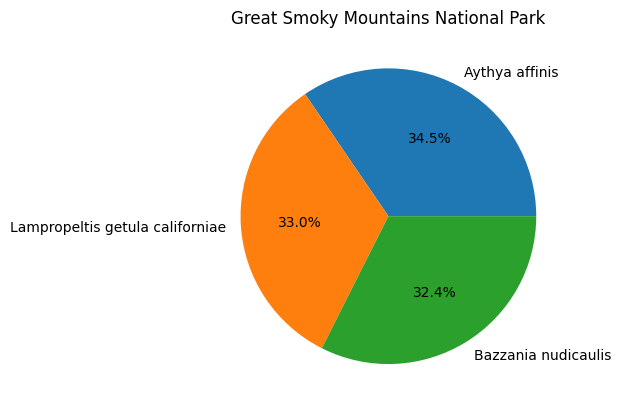

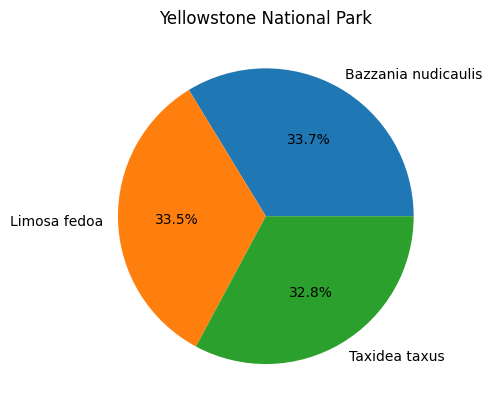

,index,index_x,scientific_name,park_name,observations,index_y,category,common_names,conservation_status
0,4304,12819,Bazzania nudicaulis,Yellowstone National Park,268,2929.0,Nonvascular Plant,Bazzania,Species of Concern
1,4724,320,Limosa fedoa,Yellowstone National Park,266,3130.0,Bird,Marbled Godwit,Species of Concern
2,6696,11488,Taxidea taxus,Yellowstone National Park,261,3029.0,Mammal,"American Badger, Badger",Species of Concern


In [11]:
"""
 since some of the animals in the observation dataset didn't have common name provided in the species_info dataset,
 I decided to use the merged dataset which consisted of both datasets to be able to drop the NA values
 and get the top 3 species for each park with the most observations which haves common names provided
 in the species_info dataset.
"""

def sqlquery(park):
    obs = pd.read_sql_query("SELECT * FROM merged_data where park_name = '" + park + "' order by observations DESC  limit 3", sql2)
    obs3 = obs.dropna()
    obs3 = pd.DataFrame(obs)
    top_5 = obs3['observations']
    top_5.plot(kind='pie', autopct='%1.1f%%', labels=obs3['scientific_name'])
    plt.ylabel("") # removes the column heading from the pie chart
    plt.title(park)
    plt.show()
    return obs3





sqlquery(park="Yosemite National Park")
sqlquery(park="Bryce National Park")
sqlquery(park="Great Smoky Mountains National Park")
sqlquery(park="Yellowstone National Park")


	Figure out the common names of the species most sighted at each park
**Yellowstone National Park**

Bazzania nudicaulis - Bazzania

**Great Smoky Mountain National Park**

Aythya affinis - Lesser Scaup

**Bryce National Park**

Myotis austroriparius - Mississippi Myotis, Southeastern Myotis

**Yosemite National Park**

Pyrocephalus rubinus - Vermilion Flycatcher



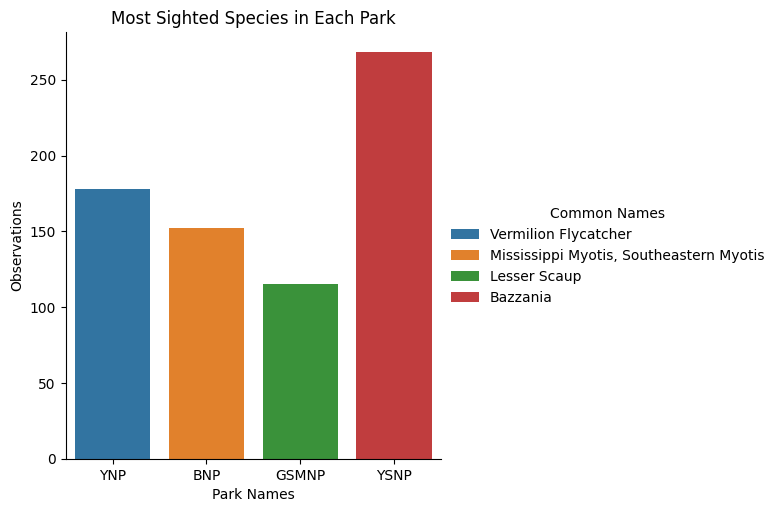

In [18]:
parks = ["Yosemite National Park", "Bryce National Park",
         "Great Smoky Mountains National Park", "Yellowstone National Park"]

sight = [] # initialize a list to store the values retrieved
sighted = pd.DataFrame() # initialize a dataframe to store the values retrieved

def sighted_scientific(parks):
  global sight # use the sight list variable already defined in the global scope
  global sighted # use the sighted dataframe variable already defined in the global scope
  for park in parks:
    new_data=pd.read_sql_query(
    "SELECT scientific_name, common_names, observations, park_name FROM merged_data where park_name = '"+
    park +"'order by observations DESC limit 1", sql2)
    sight.append(new_data)
  sighted = pd.concat(sight)
  return sighted

sighted_scientific(parks)

# creates a new variable to store the abbreviations of each park name

sighted['park_abbrev'] = sighted['park_name'].map({
    'Yosemite National Park': 'YNP',
    'Bryce National Park': 'BNP',
    'Great Smoky Mountains National Park': 'GSMNP',
    'Yellowstone National Park': 'YSNP'
})


# creates a bar graph using seaborn
bgraph = sns.catplot(data=sighted, kind="bar", x="park_abbrev", y="observations", hue="common_names")
bgraph.set_axis_labels("Park Names", "Observations")
bgraph.legend.set_title("Common Names")
plt.title("Most Sighted Species in Each Park")
plt.show()






